In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2
from tqdm import tqdm
from livelossplot import PlotLossesKeras

import numpy as np
from keras.preprocessing import image

import os
from os import listdir

In [2]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False,
                             rescale=1./255)

training_set = train_datagen.flow_from_directory('Training',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 subset='training')

Found 2870 images belonging to 4 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('Testing',target_size=(256,256), class_mode=None)

Found 394 images belonging to 4 classes.


In [4]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same', input_shape= (256,256,3)))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation = 'relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))


cnn.add(tf.keras.layers.Flatten()) 

#cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))
#opt = SGD(lr=0.001, momentum=0.9)
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'relu', input_shape= [256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))
#opt = SGD(lr=0.001, momentum=0.9)
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

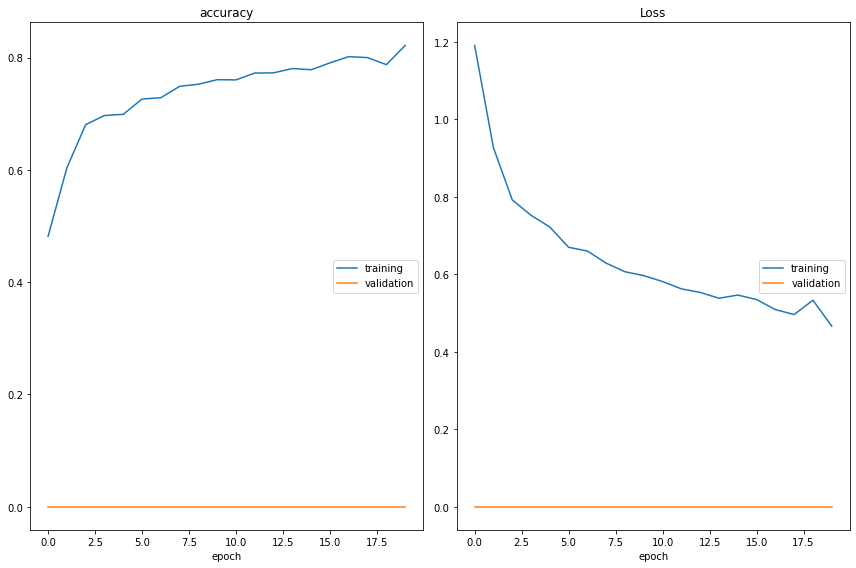

accuracy
	training         	 (min:    0.482, max:    0.822, cur:    0.822)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.466, max:    1.191, cur:    0.466)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
90/90 [==============================] - 78s 867ms/step - loss: 0.4661 - accuracy: 0.8216 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [6]:
hist = cnn.fit(training_set, validation_data = test_set, epochs = 20, callbacks = [PlotLossesKeras()])

<AxesSubplot:>

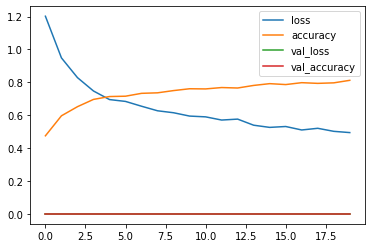

In [39]:
pd.DataFrame(hist.history).plot()

In [27]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

class_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

inverse_class_map = {
    0: 'no_tumor',
    1: 'glioma_tumor',
    2: 'meningioma_tumor',
    3: 'pituitary_tumor'
}

In [28]:
print(training_set.class_indices)

classes = {value:key for (key,value) in training_set.class_indices.items()}
print(classes)

predicted_classes=np.empty(shape=2870,dtype=np.dtype('U20'))

ind=0
for i in predictions_final.tolist():
    predicted_classes[ind]=classes[i]
    ind=ind+1
    
predicted_classes

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}


NameError: name 'predictions_final' is not defined